---
### Original tree.

In [26]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, adjusted_rand_score

class DecisionTree:
  def __init__(self, max_depth=None, min_samples_split=2, criterion='entropy'):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.criterion = criterion
    self.tree = None                                                          # переменная, в которой будет храниться готовое дерево решений.
    self.feature_importances = None                                           # переменная для важности фич


  def entropy(self, y):
    counts = np.bincount(y)                                                   # Считаем количество объектов для каждого класса. Формат - [0,0,1,2,1,2,0]
    probabilities = counts / len(y)                                           # вероятность. Формат - [x/y, x1/y, x3/y]
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])          # суммируем вероятности. p - каждая итерация в полученном массиве 'probabilities'.


  def gini(self, y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)


  def information_gain(self, y, left_indices, right_indices):
    if self.criterion == 'entropy':                                            # Выбор критерия
      impurity_func = self.entropy
    else:
      impurity_func = self.gini

    parent_impurity = impurity_func(y)                                         # неопределенность для всей выборки.
    left_impurity = impurity_func(y[left_indices])
    right_impurity = impurity_func(y[right_indices])

    n, n_left, n_right = len(y), len(left_indices), len(right_indices)
    weighted_impurity = (n_left / n) * left_impurity + (n_right / n) * right_impurity

    return parent_impurity - weighted_impurity                                 # возвращаем инф. выиг.


  def custom_1(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]                                                # .shape[1] кол-во столбцов, .shape[0] - кол-во строк.

    sum_total = 0
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = 1
      
      sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
      sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

    return N * sum_total


  def custom_2(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1] 

    sum_total = 0
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = np.sqrt(p_l)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
      sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

    return N * sum_total


  def custom_3(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1] 

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = np.sqrt(p_l*(1 - p_l))
      
      # eps. для стабильности вычислений
      denominator_1 = max(p_1 * b**2, epsilon)
      denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / denominator_1
      sum_total += ((p_2l - p_2 * p_l)**2) / denominator_2

    return N * sum_total


  def custom_4(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = p_l

      # eps. для стабильности вычислений
      # denominator_1 = max(p_1 * b**2, epsilon)
      # denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
      sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

    return N * sum_total


  def custom_5(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]

    sum_total = 0
    epsilon = 1e-10
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = p_l**2

      # eps. для стабильности вычислений
      # denominator_1 = max(p_1 * b**2, epsilon)
      # denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
      sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

    return N * sum_total
  
  
  def custom_6(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = np.log(max(p_l, epsilon))

      # eps. для стабильности вычислений
      denominator_1 = max(p_1 * b**2, epsilon)
      denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / denominator_1
      sum_total += ((p_2l - p_2 * p_l)**2) / denominator_2

    return N * sum_total
    
    
  def custom_7(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]

    sum_total = 0
    epsilon = 1e-10 
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      
      b = (-p_l)*np.log(max(p_l, epsilon))

      # eps. для стабильности вычислений
      denominator_1 = max(p_1 * b**2, epsilon)
      denominator_2 = max(p_2 * b**2, epsilon)
      
      sum_total += ((p_1l - p_1 * p_l)**2) / denominator_1
      sum_total += ((p_2l - p_2 * p_l)**2) / denominator_2

    return N * sum_total


  # Функция находит наиболее частый элемент в массиве y (метки классов).
  def most_common_label(self, y):
    return Counter(y).most_common(1)[0][0]


  def find_best_split(self, X, y, num_features):
    best_gain = 0                                                      # хранит лучшее значение inf.gain
    best_split = None                                                  # будет содержать параметры наилучшего разбиения

    for feature_index in range(num_features):                          # перебираем по очереди признаки.
      thresholds = np.unique(X[:, feature_index])                      # находим уникальные значения.
      for threshold in thresholds:                                     # для каждого уникального значения делим данные на 2 части.
        left_indices = np.where(X[:, feature_index] <= threshold)[0]   # левый - меньше уникального значения. [0] - нужен для возвращения массива, а не кортежа.
        right_indices = np.where(X[:, feature_index] > threshold)[0]   # правый - больше ун. знач. feature_index - искомый признак.

        if len(left_indices) == 0 or len(right_indices) == 0:          # условие неинформативности разбиения.
          continue                                                     # если условие срабатывает, переходим к следующей итерации, пропуская то, что ниже.

        if self.criterion == 'custom_1':
          gain = self.custom_1(y, left_indices, right_indices)
        elif self.criterion == 'custom_2':
          gain = self.custom_2(y, left_indices, right_indices)
        elif self.criterion == 'custom_3':
          gain = self.custom_3(y, left_indices, right_indices)
        elif self.criterion == 'custom_4':
          gain = self.custom_4(y, left_indices, right_indices)
        elif self.criterion == 'custom_5':
          gain = self.custom_5(y, left_indices, right_indices)
        elif self.criterion == 'custom_6':
          gain = self.custom_6(y, left_indices, right_indices)
        elif self.criterion == 'custom_7':
          gain = self.custom_7(y, left_indices, right_indices)
        else:
          gain = self.information_gain(y, left_indices, right_indices) # рассчитываем инф. прирост.

        if gain > best_gain:                                           # если текущий прирост больше самого большого
          best_gain = gain                                             # приравниваем переменную наибольшего к текущему.
          best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                        }                                              # теперь это параметры разбиения, которые дают наилучший прирост.

    return best_split                                                  # После перебора всех признаков и порогов, возвращаем параметры лучшего найденного разбиения.


  def fit(self, X, y, y_oh):
    num_features = X.shape[1]
    self.feature_importances = np.zeros(num_features)                  # инициализируем нулями
    self.tree = self.grow_tree(X, y, y_oh, depth=0)

    # нормализуем важности, чтобы сумма = 1, как в sklearn
    total = self.feature_importances.sum()
    if total > 0:
      self.feature_importances /= total


  def grow_tree(self, X, y, y_oh, depth):
    num_samples, num_features = X.shape
    num_classes = len(set(y))

    if depth == self.max_depth or num_classes == 1 or num_samples < self.min_samples_split:
      return self.most_common_label(y)

    if self.criterion == 'custom':
      best_split = self.find_best_split(X, y_oh, num_features)
    else:
      best_split = self.find_best_split(X, y, num_features)

    if best_split is None:
      return self.most_common_label(y)

    left_indices, right_indices = best_split['left_indices'], best_split['right_indices']

    # Вычисляем прирост информации для подсчета важности признаков
    if self.criterion == 'custom_1':
      gain = self.custom_1(y, left_indices, right_indices)
    elif self.criterion == 'custom_2':
      gain = self.custom_2(y, left_indices, right_indices)
    elif self.criterion == 'custom_3':
      gain = self.custom_3(y, left_indices, right_indices)
    elif self.criterion == 'custom_4':
      gain = self.custom_4(y, left_indices, right_indices)
    elif self.criterion == 'custom_5':
      gain = self.custom_5(y, left_indices, right_indices)
    elif self.criterion == 'custom_6':
      gain = self.custom_6(y, left_indices, right_indices)
    elif self.criterion == 'custom_7':
      gain = self.custom_7(y, left_indices, right_indices)
    else:
      gain = self.information_gain(y, left_indices, right_indices)        # рассчитываем инф. прирост.

    # Сохраняем вклад этого признака в важность
    self.feature_importances[best_split['feature_index']] += gain

    left_subtree = self.grow_tree(X[left_indices], y[left_indices], y_oh[left_indices], depth + 1)
    right_subtree = self.grow_tree(X[right_indices], y[right_indices], y_oh[right_indices], depth + 1)

    return {
        'feature_index': best_split['feature_index'],
        'threshold': best_split['threshold'],
        'left': left_subtree,
        'right': right_subtree
        }


  def predict(self, X):
    return np.array([self._traverse_tree(x, self.tree) for x in X])


  def _traverse_tree(self, x, node):
    if isinstance(node, dict):
      if x[node['feature_index']] <= node['threshold']:
        return self._traverse_tree(x, node['left'])
      else:
        return self._traverse_tree(x, node['right'])

    return node                                                             # Если нет, то это лист и присваиваем метку.


  def plot_tree(self, accuracy, precision, recall, f1, ari, importances, title=None, tree=None, feature_names=None, class_names=None):
    if tree is None:
      tree = self.tree

    fig = plt.figure(figsize=(10, 5))
    fig.patch.set_edgecolor('red')
    fig.patch.set_linewidth(2)
    fig.patch.set_facecolor('white')  # по желанию

    self._plot_subtree(tree, 0.5, 1.0, 0.5, 0.1, feature_names, class_names)
    plt.axis("off")

    # Adding the legend with metrics
    plt.figtext(0.12, 0.01, f"Accuracy: {accuracy*100:.2f}%\nPrecision: {precision*100:.2f}%\nRecall:     {recall*100:.2f}%\nF1 Score: {f1*100:.2f}%\nARI:          {ari*100:.2f}%",
                  ha="left", va="top", fontsize=10, bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"))
    plt.figtext(0.90, 0.01, importances, ha="right", va="top", fontsize=10, bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"))
    plt.title(title)
    plt.show()


  def _plot_subtree(self, node, x, y, dx, dy, feature_names, class_names):
    if isinstance(node, dict):
      # Node: Plot the decision
      feature_index = node["feature_index"]
      threshold = node["threshold"]

      if feature_names is not None:
        feature_name = feature_names[feature_index]
      else:
        feature_name = f"Feature {feature_index}"
      node_text = f"{feature_name} <= {threshold:.2f}"

      plt.text(x, y, node_text, ha="center", va="center", bbox=dict(boxstyle="round", fc="white"))

      # Plot left subtree
      self._plot_subtree(node["left"], x - dx, y - dy, dx / 2, dy, feature_names, class_names)
      plt.plot([x, x - dx], [y, y - dy], 'k-')

      # Plot right subtree
      self._plot_subtree(node["right"], x + dx, y - dy, dx / 2, dy, feature_names, class_names)
      plt.plot([x, x + dx], [y, y - dy], 'k-')
    else:
      # Leaf: Plot the class label
      if class_names is not None:
        leaf_text = class_names[node]
      else:
        leaf_text = f"Class {node}"
      plt.text(x, y, leaf_text, ha="center", va="center", bbox=dict(boxstyle="round", fc="yellow"))


  def plot_feature_importances(self, feature_names=None):
    if self.feature_importances is None:
      print("Модель не обучена. Нет важностей признаков.")
      return

    if feature_names is None:
      feature_names = [f"Feature {i}" for i in range(len(self.feature_importances))]

    importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': self.feature_importances
    }).sort_values(by='Importance', ascending=False)

    return importances.head(10)

--- 
### Testing gini & custom_1

In [17]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, adjusted_rand_score

class DecisionTree:
  def __init__(self, max_depth=None, min_samples_split=2, criterion='entropy'):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.criterion = criterion
    self.tree = None                                                          # переменная, в которой будет храниться готовое дерево решений.
    self.feature_importances = None                                           # переменная для важности фич


  def entropy(self, y):
    counts = np.bincount(y)                                                   # Считаем количество объектов для каждого класса. Формат - [0,0,1,2,1,2,0]
    probabilities = counts / len(y)                                           # вероятность. Формат - [x/y, x1/y, x3/y]
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])          # суммируем вероятности. p - каждая итерация в полученном массиве 'probabilities'.


  def gini(self, y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)


  def information_gain(self, y, left_indices, right_indices):
    if self.criterion == 'entropy':                                            # Выбор критерия
      impurity_func = self.entropy
    else:
      impurity_func = self.gini

    parent_impurity = impurity_func(y)                                         # неопределенность для всей выборки.
    left_impurity = impurity_func(y[left_indices])
    right_impurity = impurity_func(y[right_indices])

    n, n_left, n_right = len(y), len(left_indices), len(right_indices)
    weighted_impurity = (n_left / n) * left_impurity + (n_right / n) * right_impurity
    inf_gain = parent_impurity - weighted_impurity
    
    # print(f'Inf. gain "gini": {parent_impurity-weighted_impurity}')
    return inf_gain                                                            # возвращаем инф. выиг.


  def custom_1(self, y, left_indices, right_indices):
    N = y_oh.sum()

    left = y_oh[left_indices]
    right = y_oh[right_indices]
    p_1 = left.sum() / N
    p_2 = right.sum() / N
    num_classes = y_oh.shape[1]                                                # .shape[1] кол-во столбцов, .shape[0] - кол-во строк.

    sum_total = 0
    
    for l in range(num_classes):
      p_1l = left[:, l].sum() / N
      p_2l = right[:, l].sum() / N
      p_l = p_1l + p_2l
      b = 1
      
      sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
      sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

    # print(f'Custom_1: {sum_total}')
    
    return sum_total
  
  # Функция находит наиболее частый элемент в массиве y (метки классов).
  def most_common_label(self, y):
    return Counter(y).most_common(1)[0][0]


  def find_best_split(self, X, y, num_features):
    best_gain = 0                                                      # хранит лучшее значение inf.gain
    best_split = None                                                  # будет содержать параметры наилучшего разбиения

    for feature_index in range(num_features):                          # перебираем по очереди признаки.
      thresholds = np.unique(X[:, feature_index])                      # находим уникальные значения.
      for threshold in thresholds:                                     # для каждого уникального значения делим данные на 2 части.
        left_indices = np.where(X[:, feature_index] <= threshold)[0]   # левый - меньше уникального значения. [0] - нужен для возвращения массива, а не кортежа.
        right_indices = np.where(X[:, feature_index] > threshold)[0]   # правый - больше ун. знач. feature_index - искомый признак.

        if len(left_indices) == 0 or len(right_indices) == 0:          # условие неинформативности разбиения.
          continue                                                     # если условие срабатывает, переходим к следующей итерации, пропуская то, что ниже.

        if self.criterion == 'custom_1':
          gain = self.custom_1(y, left_indices, right_indices)
        else:
          gain = self.information_gain(y, left_indices, right_indices) # рассчитываем инф. прирост.

        if gain > best_gain:                                           # если текущий прирост больше самого большого
          best_gain = gain                                             # приравниваем переменную наибольшего к текущему.
          best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                        }                                              # теперь это параметры разбиения, которые дают наилучший прирост.
    print(best_gain)
    print(best_split)
    return best_split                                                  # После перебора всех признаков и порогов, возвращаем параметры лучшего найденного разбиения.


  def fit(self, X, y, y_oh):
    num_features = X.shape[1]
    self.feature_importances = np.zeros(num_features)                  # инициализируем нулями
    self.tree = self.grow_tree(X, y, y_oh, depth=0)

    # нормализуем важности, чтобы сумма = 1, как в sklearn
    total = self.feature_importances.sum()
    if total > 0:
      self.feature_importances /= total


  def grow_tree(self, X, y, y_oh, depth):
    num_samples, num_features = X.shape
    num_classes = len(set(y))

    if depth == self.max_depth or num_classes == 1 or num_samples < self.min_samples_split:
      return self.most_common_label(y)

    if self.criterion == 'custom':
      best_split = self.find_best_split(X, y_oh, num_features)
    else:
      best_split = self.find_best_split(X, y, num_features)

    if best_split is None:
      return self.most_common_label(y)

    left_indices, right_indices = best_split['left_indices'], best_split['right_indices']

    # Вычисляем прирост информации для подсчета важности признаков
    if self.criterion == 'custom_1':
      gain = self.custom_1(y, left_indices, right_indices)
    else:
      gain = self.information_gain(y, left_indices, right_indices)        # рассчитываем инф. прирост.

    self.feature_importances[best_split['feature_index']] += gain         # Сохраняем вклад этого признака в важность


    left_subtree = self.grow_tree(X[left_indices], y[left_indices], y_oh[left_indices], depth + 1)
    right_subtree = self.grow_tree(X[right_indices], y[right_indices], y_oh[right_indices], depth + 1)

    return {
        'feature_index': best_split['feature_index'],
        'threshold': best_split['threshold'],
        'left': left_subtree,
        'right': right_subtree
        }


  def predict(self, X):
    return np.array([self._traverse_tree(x, self.tree) for x in X])


  def _traverse_tree(self, x, node):
    if isinstance(node, dict):
      if x[node['feature_index']] <= node['threshold']:
        return self._traverse_tree(x, node['left'])
      else:
        return self._traverse_tree(x, node['right'])

    return node                                                             # Если нет, то это лист и присваиваем метку.

In [20]:
from sklearn.datasets import load_wine

''' Iris '''

wine = load_wine()
X, y = wine.data, wine.target
num_samples, num_features = X.shape   # вернет num_samples = x, num_features = y, ari
ohe = OneHotEncoder(sparse_output=False)
y_oh = ohe.fit_transform(y.reshape(-1,1)).astype(int)

''' CUSTOM_1 '''
custom_1 = DecisionTree(max_depth=6, criterion='custom_1')
custom_1.fit(X, y, y_oh)
y_pred = custom_1.predict(X)
# accuracy_1, precision_1 = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
# recall_1, f1_1 = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
# ari_1 = adjusted_rand_score(y, y_pred)

0.2517854009364391
{'feature_index': 12, 'threshold': np.float64(750.0), 'left_indices': array([  4,  43,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        71,  72,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 142, 143, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 177]), 'right_indices': array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  

In [21]:
''' GINI '''
gini = DecisionTree(max_depth=6, criterion='gini')
gini.fit(X, y, y_oh)
y_pred = gini.predict(X)
accuracy_gini, precision_gini = accuracy_score(y, y_pred), precision_score(y, y_pred, average='weighted')
recall_gini, f1_gini = recall_score(y, y_pred, average='weighted'), f1_score(y, y_pred, average='weighted')
ari_gini = adjusted_rand_score(y, y_pred)

0.2517854009364393
{'feature_index': 12, 'threshold': np.float64(750.0), 'left_indices': array([  4,  43,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        71,  72,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 142, 143, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 177]), 'right_indices': array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  

Сравнение критериев разделения:
0.15586109854881647
0.05632846880599785
0.024743496769116195
0.21499999999999997
-inf
0.0015049717817790906
-inf
0.07336296296296296
-inf
0.07194729743749352
0.1464258252320536
-inf
0.09169876408223013
0.07060150008550975
0.29517906336088157
-inf
-inf
0.05104889643463498
0.08946164037095025
0.00270551508844953
0.045774168100176496
0.15945860995479433
0.11334969294635104
0.043082916175143274
0.03960843257409335
0.19382716049382714
0.008498989898989904

Критерий: CUSTOM_1
Точность: 0.7700
Время обучения: 0.3362 сек
-0.510636860634857
-0.2602635165833712
-0.08227891941814819
-0.27
-inf
-0.014754098360655731
-inf
-0.4770370370370371
-inf
-0.44304388422035484
-0.2864845938375351
-inf
-0.5061176781846577
-0.30940387481371096
-0.23787878787878788
-inf
-inf
-0.20915110356536495
-0.4091533180778032
-0.02903225806451612
-0.5029631804468727
-0.47740669616765474
-0.45754804783842895
-0.2505108787113836
-0.3373715651135005
-0.4296296296296296
-0.2602121212121213

Кри

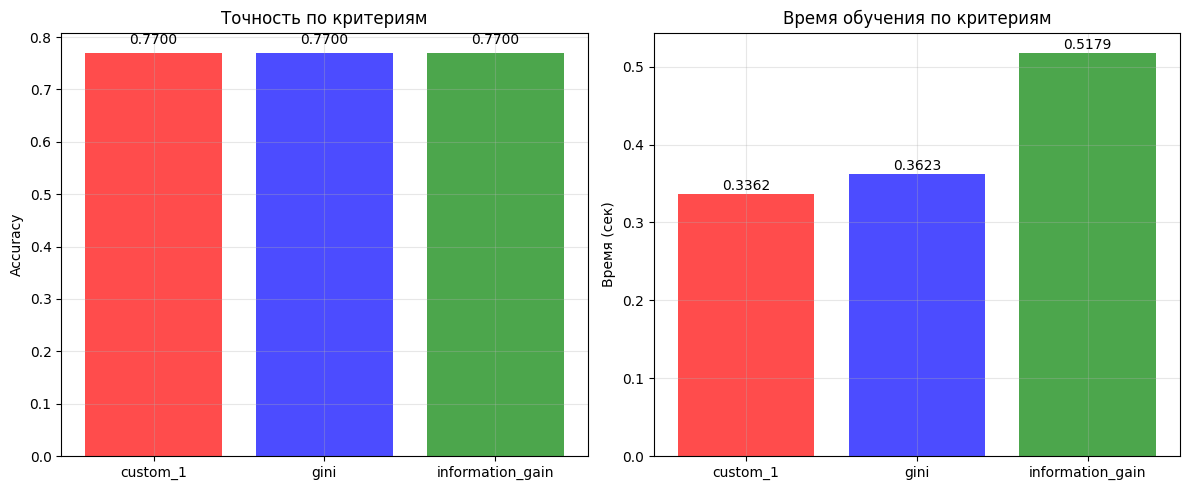


АНАЛИЗ РЕЗУЛЬТАТОВ:
Лучший критерий по точности: CUSTOM_1
Точность лучшего критерия: 0.7700

ДЕМОНСТРАЦИЯ КРИТЕРИЕВ НА ПРОСТОМ ПРИМЕРЕ:
Custom_1 score: 0.4688
Gini score: -0.0000
Information Gain score: 0.4688
Примечание: Все критерии должны показывать хорошие значения для идеального разделения


In [23]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, criterion='custom_1', max_depth=5, min_samples_split=2):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
    
    def _one_hot_encode(self, y):
        """One-hot кодирование меток"""
        classes = np.unique(y)
        y_oh = np.zeros((len(y), len(classes)))
        for i, cls in enumerate(classes):
            y_oh[y == cls, i] = 1
        return y_oh
    
    def custom_1(self, y_oh, left_indices, right_indices):
        """Твой кастомный критерий (похож на хи-квадрат)"""
        N = y_oh.sum()
        
        left = y_oh[left_indices]
        right = y_oh[right_indices]
        p_1 = left.sum() / N
        p_2 = right.sum() / N
        num_classes = y_oh.shape[1]
        
        sum_total = 0
        
        for l in range(num_classes):
            p_1l = left[:, l].sum() / N
            p_2l = right[:, l].sum() / N
            p_l = p_1l + p_2l
            b = 1
            
            sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
            sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2
        
        return sum_total
    
    def gini_impurity(self, y):
        """Вычисляет Gini impurity для набора меток"""
        if len(y) == 0:
            return 0
        
        # Получаем вероятности классов
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        
        # Gini impurity = 1 - sum(p_i^2)
        return 1 - np.sum(probabilities**2)
    
    def gini_criterion(self, y, left_indices, right_indices):
        """Критерий Джини (чем меньше, тем лучше)"""
        y_left = y[left_indices]
        y_right = y[right_indices]
        
        # Gini impurity для каждой ветви
        gini_left = self.gini_impurity(y_left)
        gini_right = self.gini_impurity(y_right)
        
        # Взвешенная Gini impurity
        n_left = len(left_indices)
        n_right = len(right_indices)
        n_total = n_left + n_right
        
        weighted_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        
        # Возвращаем отрицательное значение (чем меньше impurity, тем лучше)
        return -weighted_gini
    
    def information_gain(self, y, left_indices, right_indices):
        """Информационный выигрыш через Gini impurity"""
        # Gini impurity родительского узла
        parent_gini = self.gini_impurity(y)
        
        # Gini impurity дочерних узлов
        y_left = y[left_indices]
        y_right = y[right_indices]
        
        gini_left = self.gini_impurity(y_left)
        gini_right = self.gini_impurity(y_right)
        
        # Взвешенная Gini impurity дочерних узлов
        n_left = len(left_indices)
        n_right = len(right_indices)
        n_total = n_left + n_right
        
        children_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        
        # Информационный выигрыш = уменьшение Gini impurity
        information_gain = parent_gini - children_gini
        
        return information_gain
    
    def _calculate_criterion(self, y, y_oh, left_indices, right_indices):
        """Вычисляет критерий в зависимости от выбора"""
        if self.criterion == 'custom_1':
            return self.custom_1(y_oh, left_indices, right_indices)
        elif self.criterion == 'gini':
            return self.gini_criterion(y, left_indices, right_indices)
        elif self.criterion == 'information_gain':
            return self.information_gain(y, left_indices, right_indices)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")
    
    def _find_best_split(self, X, y, y_oh):
        """Находит лучшее разделение"""
        best_score = -float('inf')
        best_feature = None
        best_threshold = None
        
        n_samples, n_features = X.shape
        
        for feature_index in range(n_features):
            feature_values = np.unique(X[:, feature_index])
            
            for threshold in feature_values:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]
                
                if len(left_indices) < self.min_samples_split or len(right_indices) < self.min_samples_split:
                    continue
                
                score = self._calculate_criterion(y, y_oh, left_indices, right_indices)
                
                if score > best_score:
                    best_score = score
                    best_feature = feature_index
                    best_threshold = threshold
        
        print(best_score)
        return best_feature, best_threshold, best_score
    
    def _build_tree(self, X, y, y_oh, depth=0):
        """Рекурсивно строит дерево"""
        n_samples, n_features = X.shape
        
        # Условия остановки
        if (depth >= self.max_depth or 
            n_samples < self.min_samples_split or 
            len(np.unique(y)) == 1):
            
            most_common = Counter(y).most_common(1)[0][0]
            return Node(value=most_common)
        
        # Находим лучшее разделение
        best_feature, best_threshold, best_score = self._find_best_split(X, y, y_oh)
        
        if best_score == -float('inf'):
            most_common = Counter(y).most_common(1)[0][0]
            return Node(value=most_common)
        
        # Разделяем данные
        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]
        
        # Рекурсивно строим поддеревья
        left_subtree = self._build_tree(X[left_indices], y[left_indices], 
                                       y_oh[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], 
                                        y_oh[right_indices], depth + 1)
        
        return Node(feature_index=best_feature, threshold=best_threshold,
                   left=left_subtree, right=right_subtree)
    
    def fit(self, X, y):
        """Обучение дерева"""
        y_oh = self._one_hot_encode(y)
        self.root = self._build_tree(X, y, y_oh)
        return self
    
    def _predict_sample(self, x, node):
        """Предсказание для одного образца"""
        if node.value is not None:
            return node.value
        
        if x[node.feature_index] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)
    
    def predict(self, X):
        """Предсказание для множества образцов"""
        return np.array([self._predict_sample(x, self.root) for x in X])
    
    def print_tree(self, node=None, depth=0):
        """Визуализация дерева"""
        if node is None:
            node = self.root
        
        indent = "  " * depth
        
        if node.value is not None:
            print(f"{indent}Leaf: class {node.value}")
        else:
            print(f"{indent}[feature_{node.feature_index} <= {node.threshold:.2f}]")
            self.print_tree(node.left, depth + 1)
            print(f"{indent}[feature_{node.feature_index} > {node.threshold:.2f}]")
            self.print_tree(node.right, depth + 1)

def compare_criteria():
    """Сравнивает все три критерия"""
    # Создаем данные
    X, y = make_classification(n_samples=1000, n_features=6, n_classes=3, 
                              n_informative=4, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    criteria = ['custom_1', 'gini', 'information_gain']
    results = {}
    
    print("Сравнение критериев разделения:")
    print("=" * 60)
    
    for criterion in criteria:
        start_time = time.time()
        
        # Обучаем дерево
        tree = DecisionTree(criterion=criterion, max_depth=5, min_samples_split=10)
        tree.fit(X_train, y_train)
        
        # Предсказания
        y_pred = tree.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        end_time = time.time()
        training_time = end_time - start_time
        
        results[criterion] = {
            'accuracy': accuracy,
            'time': training_time,
            'tree': tree
        }
        
        print(f"\nКритерий: {criterion.upper()}")
        print(f"Точность: {accuracy:.4f}")
        print(f"Время обучения: {training_time:.4f} сек")
    
    # Визуализация сравнения
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # График точности
    accuracies = [results[crit]['accuracy'] for crit in criteria]
    colors = ['red', 'blue', 'green']
    bars = ax1.bar(criteria, accuracies, color=colors, alpha=0.7)
    ax1.set_title('Точность по критериям')
    ax1.set_ylabel('Accuracy')
    ax1.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar, accuracy in zip(bars, accuracies):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{accuracy:.4f}', ha='center', va='bottom')
    
    # График времени
    times = [results[crit]['time'] for crit in criteria]
    bars = ax2.bar(criteria, times, color=colors, alpha=0.7)
    ax2.set_title('Время обучения по критериям')
    ax2.set_ylabel('Время (сек)')
    ax2.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar, time_val in zip(bars, times):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{time_val:.4f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Анализ результатов
    print("\n" + "=" * 60)
    print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
    print("=" * 60)
    
    best_criterion = max(results.keys(), key=lambda x: results[x]['accuracy'])
    print(f"Лучший критерий по точности: {best_criterion.upper()}")
    print(f"Точность лучшего критерия: {results[best_criterion]['accuracy']:.4f}")
    
    # Демонстрация работы критериев на простом примере
    print("\n" + "=" * 60)
    print("ДЕМОНСТРАЦИЯ КРИТЕРИЕВ НА ПРОСТОМ ПРИМЕРЕ:")
    print("=" * 60)
    
    # Простой пример для демонстрации
    y_simple = np.array([0, 0, 0, 1, 1, 1, 1, 1])
    left_indices_simple = np.array([0, 1, 2])  # все классы 0
    right_indices_simple = np.array([3, 4, 5, 6, 7])  # все классы 1
    
    y_oh_simple = np.zeros((len(y_simple), 2))
    y_oh_simple[y_simple == 0, 0] = 1
    y_oh_simple[y_simple == 1, 1] = 1
    
    demo_tree = DecisionTree()
    
    custom_score = demo_tree.custom_1(y_oh_simple, left_indices_simple, right_indices_simple)
    gini_score = demo_tree.gini_criterion(y_simple, left_indices_simple, right_indices_simple)
    ig_score = demo_tree.information_gain(y_simple, left_indices_simple, right_indices_simple)
    
    print(f"Custom_1 score: {custom_score:.4f}")
    print(f"Gini score: {gini_score:.4f}")
    print(f"Information Gain score: {ig_score:.4f}")
    print("Примечание: Все критерии должны показывать хорошие значения для идеального разделения")

# Запуск сравнения
if __name__ == "__main__":
    compare_criteria()


ДАТАСЕТ IRIS
Размер данных: (150, 4)
Признаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Классы: ['setosa' 'versicolor' 'virginica']
Распределение классов: [50 50 50]

СРАВНЕНИЕ КРИТЕРИЕВ НА IRIS DATASET:
Best_feature: 2
Best_threshold: 1.9
Best_score:0.09809135082604471
Best_feature: 2
Best_threshold: 4.7
Best_score:0.17756836659275688
Best_feature: 0
Best_threshold: 5.1
Best_score:0.005142332415059683
Best_feature: None
Best_threshold: None
Best_score:-inf
Best_feature: 3
Best_threshold: 1.7
Best_score:0.034647486164440355
Best_feature: None
Best_threshold: None
Best_score:-inf
Best_feature: 2
Best_threshold: 4.9
Best_score:0.005142332415059683

Критерий: CUSTOM_1
Точность: 0.9778
Время обучения: 0.0147 сек
Best_feature: 2
Best_threshold: 1.9
Best_score:-0.3523809523809524
Best_feature: 2
Best_threshold: 4.7
Best_score:-0.14486326681448622
Best_feature: 0
Best_threshold: 5.1
Best_score:-0.048484848484848464
Best_feature: None
Best_threshold: N

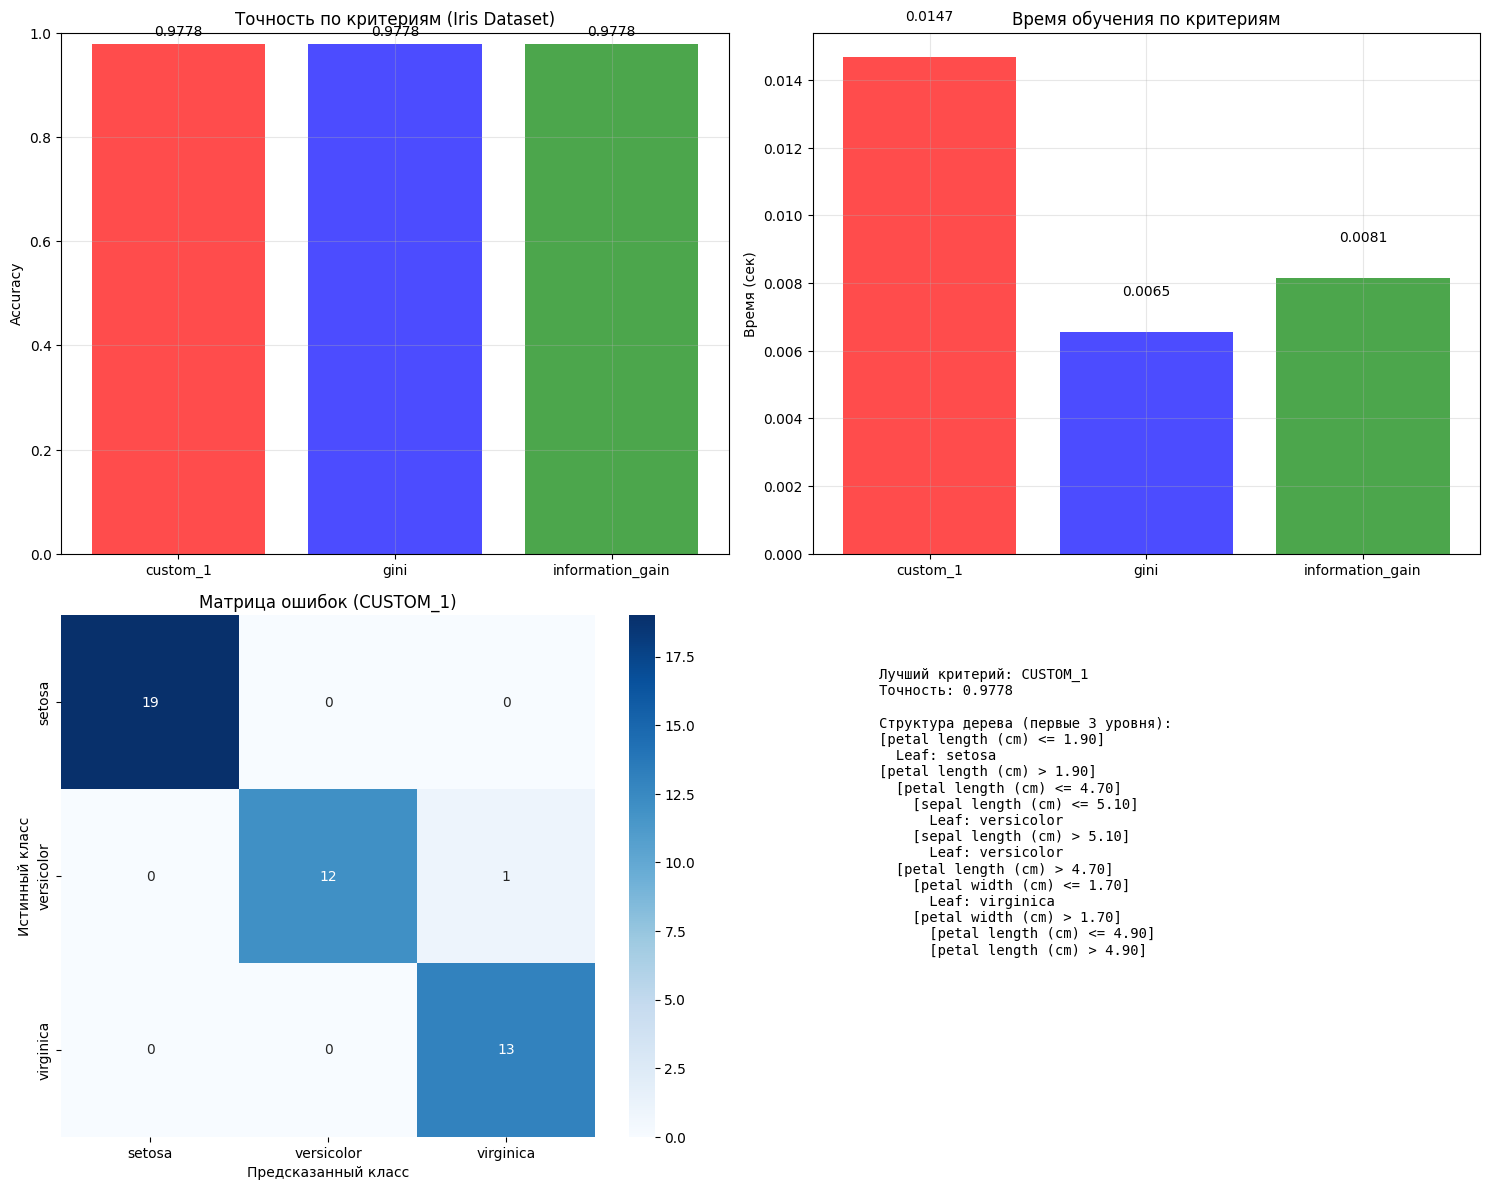


ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ:
Лучший критерий: CUSTOM_1 (точность: 0.9778)
Худший критерий: CUSTOM_1 (точность: 0.9778)

Отчет по классификации для CUSTOM_1:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Пример предсказания:
Образец: [6.1 2.8 4.7 1.2]
Истинный класс: versicolor
Предсказанный класс: versicolor

АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ:

CUSTOM_1:
  sepal length (cm): 1 использований
  sepal width (cm): 0 использований
  petal length (cm): 3 использований
  petal width (cm): 1 использований

GINI:
  sepal length (cm): 1 использований
  sepal width (cm): 0 использований
  petal length (cm): 3 использований
  petal width (cm): 1 использований

INFORMATION_G

In [27]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import time

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, criterion='custom_1', max_depth=5, min_samples_split=2):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
        self.feature_names = None
    
    def _one_hot_encode(self, y):
        """One-hot кодирование меток"""
        classes = np.unique(y)
        y_oh = np.zeros((len(y), len(classes)))
        for i, cls in enumerate(classes):
            y_oh[y == cls, i] = 1
        return y_oh
    
    def custom_1(self, y_oh, left_indices, right_indices):
        """Твой кастомный критерий (похож на хи-квадрат)"""
        N = y_oh.sum()
        
        left = y_oh[left_indices]
        right = y_oh[right_indices]
        p_1 = left.sum() / N
        p_2 = right.sum() / N
        num_classes = y_oh.shape[1]
        
        sum_total = 0
        
        for l in range(num_classes):
            p_1l = left[:, l].sum() / N
            p_2l = right[:, l].sum() / N
            p_l = p_1l + p_2l
            b = np.sqrt(p_l)
            
            # Избегаем деления на ноль
            if p_1 > 0:
                sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
            if p_2 > 0:
                sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2
        
        return sum_total
    
    def gini_impurity(self, y):
        """Вычисляет Gini impurity для набора меток"""
        if len(y) == 0:
            return 0
        
        # Получаем вероятности классов
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        
        # Gini impurity = 1 - sum(p_i^2)
        return 1 - np.sum(probabilities**2)
    
    def gini_criterion(self, y, left_indices, right_indices):
        """Критерий Джини (чем меньше, тем лучше)"""
        y_left = y[left_indices]
        y_right = y[right_indices]
        
        # Gini impurity для каждой ветви
        gini_left = self.gini_impurity(y_left)
        gini_right = self.gini_impurity(y_right)
        
        # Взвешенная Gini impurity
        n_left = len(left_indices)
        n_right = len(right_indices)
        n_total = n_left + n_right
        
        weighted_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        
        # Возвращаем отрицательное значение (чем меньше impurity, тем лучше)
        return -weighted_gini
    
    def information_gain(self, y, left_indices, right_indices):
        """Информационный выигрыш через Gini impurity"""
        # Gini impurity родительского узла
        parent_gini = self.gini_impurity(y)
        
        # Gini impurity дочерних узлов
        y_left = y[left_indices]
        y_right = y[right_indices]
        
        gini_left = self.gini_impurity(y_left)
        gini_right = self.gini_impurity(y_right)
        
        # Взвешенная Gini impurity дочерних узлов
        n_left = len(left_indices)
        n_right = len(right_indices)
        n_total = n_left + n_right
        
        children_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        
        # Информационный выигрыш = уменьшение Gini impurity
        information_gain = parent_gini - children_gini
        
        return information_gain
    
    def _calculate_criterion(self, y, y_oh, left_indices, right_indices):
        """Вычисляет критерий в зависимости от выбора"""
        if self.criterion == 'custom_1':
            return self.custom_1(y_oh, left_indices, right_indices)
        elif self.criterion == 'gini':
            return self.gini_criterion(y, left_indices, right_indices)
        elif self.criterion == 'information_gain':
            return self.information_gain(y, left_indices, right_indices)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")
    
    def _find_best_split(self, X, y, y_oh):
        """Находит лучшее разделение"""
        best_score = -float('inf')
        best_feature = None
        best_threshold = None
        
        n_samples, n_features = X.shape
        
        for feature_index in range(n_features):
            feature_values = np.unique(X[:, feature_index])
            
            for threshold in feature_values:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]
                
                if len(left_indices) < self.min_samples_split or len(right_indices) < self.min_samples_split:
                    continue
                
                score = self._calculate_criterion(y, y_oh, left_indices, right_indices)
                
                if score > best_score:
                    best_score = score
                    best_feature = feature_index
                    best_threshold = threshold
        print(f'Best_feature: {best_feature}')
        print(f'Best_threshold: {best_threshold}')
        print(f'Best_score:{best_score}')
        return best_feature, best_threshold, best_score
    
    def _build_tree(self, X, y, y_oh, depth=0):
        """Рекурсивно строит дерево"""
        n_samples, n_features = X.shape
        
        # Условия остановки
        if (depth >= self.max_depth or 
            n_samples < self.min_samples_split or 
            len(np.unique(y)) == 1):
            
            most_common = Counter(y).most_common(1)[0][0]
            return Node(value=most_common)
        
        # Находим лучшее разделение
        best_feature, best_threshold, best_score = self._find_best_split(X, y, y_oh)
        
        if best_score == -float('inf'):
            most_common = Counter(y).most_common(1)[0][0]
            return Node(value=most_common)
        
        # Разделяем данные
        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]
        
        # Рекурсивно строим поддеревья
        left_subtree = self._build_tree(X[left_indices], y[left_indices], 
                                       y_oh[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], 
                                        y_oh[right_indices], depth + 1)
        
        return Node(feature_index=best_feature, threshold=best_threshold,
                   left=left_subtree, right=right_subtree)
    
    def fit(self, X, y, feature_names=None):
        """Обучение дерева"""
        self.feature_names = feature_names
        y_oh = self._one_hot_encode(y)
        self.root = self._build_tree(X, y, y_oh)
        return self
    
    def _predict_sample(self, x, node):
        """Предсказание для одного образца"""
        if node.value is not None:
            return node.value
        
        if x[node.feature_index] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)
    
    def predict(self, X):
        """Предсказание для множества образцов"""
        return np.array([self._predict_sample(x, self.root) for x in X])
    
    def print_tree(self, node=None, depth=0):
        """Визуализация дерева"""
        if node is None:
            node = self.root
        
        indent = "  " * depth
        
        if node.value is not None:
            print(f"{indent}Leaf: class {node.value}")
        else:
            feature_name = f"feature_{node.feature_index}" 
            if self.feature_names is not None:
                feature_name = self.feature_names[node.feature_index]
            print(f"{indent}[{feature_name} <= {node.threshold:.2f}]")
            self.print_tree(node.left, depth + 1)
            print(f"{indent}[{feature_name} > {node.threshold:.2f}]")
            self.print_tree(node.right, depth + 1)

def test_on_iris():
    """Тестирование на датасете ирисов"""
    # Загружаем данные
    iris = load_iris()
    X, y = iris.data, iris.target
    feature_names = iris.feature_names
    target_names = iris.target_names
    
    print("ДАТАСЕТ IRIS")
    print("=" * 60)
    print(f"Размер данных: {X.shape}")
    print(f"Признаки: {feature_names}")
    print(f"Классы: {target_names}")
    print(f"Распределение классов: {np.bincount(y)}")
    print()
    
    # Разделяем на train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    criteria = ['custom_1', 'gini', 'information_gain']
    results = {}
    
    print("СРАВНЕНИЕ КРИТЕРИЕВ НА IRIS DATASET:")
    print("=" * 60)
    
    for criterion in criteria:
        start_time = time.time()
        
        # Обучаем дерево
        tree = DecisionTree(criterion=criterion, max_depth=4, min_samples_split=5)
        tree.fit(X_train, y_train, feature_names=feature_names)
        
        # Предсказания
        y_pred = tree.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        end_time = time.time()
        training_time = end_time - start_time
        
        results[criterion] = {
            'accuracy': accuracy,
            'time': training_time,
            'tree': tree,
            'predictions': y_pred
        }
        
        print(f"\nКритерий: {criterion.upper()}")
        print(f"Точность: {accuracy:.4f}")
        print(f"Время обучения: {training_time:.4f} сек")
    
    # Визуализация сравнения
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # График точности
    accuracies = [results[crit]['accuracy'] for crit in criteria]
    colors = ['red', 'blue', 'green']
    bars = ax1.bar(criteria, accuracies, color=colors, alpha=0.7)
    ax1.set_title('Точность по критериям (Iris Dataset)')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0, 1.0)
    ax1.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar, accuracy in zip(bars, accuracies):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{accuracy:.4f}', ha='center', va='bottom')
    
    # График времени
    times = [results[crit]['time'] for crit in criteria]
    bars = ax2.bar(criteria, times, color=colors, alpha=0.7)
    ax2.set_title('Время обучения по критериям')
    ax2.set_ylabel('Время (сек)')
    ax2.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar, time_val in zip(bars, times):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{time_val:.4f}', ha='center', va='bottom')
    
    # Матрицы ошибок для лучшего критерия
    best_criterion = max(results.keys(), key=lambda x: results[x]['accuracy'])
    best_tree = results[best_criterion]['tree']
    best_predictions = results[best_criterion]['predictions']
    
    cm = confusion_matrix(y_test, best_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names, ax=ax3)
    ax3.set_title(f'Матрица ошибок ({best_criterion.upper()})')
    ax3.set_xlabel('Предсказанный класс')
    ax3.set_ylabel('Истинный класс')
    
    # Визуализация дерева для лучшего критерия
    ax4.axis('off')
    tree_text = f"Лучший критерий: {best_criterion.upper()}\n"
    tree_text += f"Точность: {results[best_criterion]['accuracy']:.4f}\n\n"
    tree_text += "Структура дерева (первые 3 уровня):\n"
    
    # Простая визуализация структуры дерева
    def get_tree_structure(node, depth=0, max_depth=3):
        if depth > max_depth or node is None:
            return ""
        indent = "  " * depth
        if node.value is not None:
            return f"{indent}Leaf: {target_names[node.value]}\n"
        else:
            feature_name = feature_names[node.feature_index]
            structure = f"{indent}[{feature_name} <= {node.threshold:.2f}]\n"
            structure += get_tree_structure(node.left, depth + 1, max_depth)
            structure += f"{indent}[{feature_name} > {node.threshold:.2f}]\n"
            structure += get_tree_structure(node.right, depth + 1, max_depth)
            return structure
    
    tree_structure = get_tree_structure(best_tree.root)
    ax4.text(0.1, 0.9, tree_text + tree_structure, fontfamily='monospace', 
             fontsize=10, verticalalignment='top', transform=ax4.transAxes)
    
    plt.tight_layout()
    plt.show()
    
    # Детальный анализ
    print("\n" + "=" * 60)
    print("ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ:")
    print("=" * 60)
    
    best_criterion = max(results.keys(), key=lambda x: results[x]['accuracy'])
    worst_criterion = min(results.keys(), key=lambda x: results[x]['accuracy'])
    
    print(f"Лучший критерий: {best_criterion.upper()} (точность: {results[best_criterion]['accuracy']:.4f})")
    print(f"Худший критерий: {worst_criterion.upper()} (точность: {results[worst_criterion]['accuracy']:.4f})")
    
    # Отчет по классификации для лучшего критерия
    print(f"\nОтчет по классификации для {best_criterion.upper()}:")
    print(classification_report(y_test, results[best_criterion]['predictions'], 
                              target_names=target_names))
    
# Пример предсказания
    print("\nПример предсказания:")
    sample_idx = 0
    sample = X_test[sample_idx]
    true_class = target_names[y_test[sample_idx]]
    pred_class = target_names[results[best_criterion]['predictions'][sample_idx]]
    
    print(f"Образец: {sample}")
    print(f"Истинный класс: {true_class}")
    print(f"Предсказанный класс: {pred_class}")
    
    # Визуализация важности признаков (по количеству использований в дереве)
    print("\n" + "=" * 60)
    print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ:")
    print("=" * 60)
    
    def count_feature_usage(node, feature_counts):
        if node is None:
            return
        if node.feature_index is not None:
            feature_counts[node.feature_index] += 1
        count_feature_usage(node.left, feature_counts)
        count_feature_usage(node.right, feature_counts)
    
    for criterion in criteria:
        feature_counts = np.zeros(X.shape[1])
        count_feature_usage(results[criterion]['tree'].root, feature_counts)
        print(f"\n{criterion.upper()}:")
        for i, count in enumerate(feature_counts):
            print(f"  {feature_names[i]}: {int(count)} использований")

# Запуск тестирования
if __name__ == "__main__":
    test_on_iris()
   


---
---
### Maybe Final Decision Tree

СИНТЕТИЧЕСКИЕ ДАННЫЕ:
Размер данных: (100, 6)
Классы: [0 1 2]
Распределение классов: [34 33 33]

Сравнение критериев на Synthetic Data:

Критерий: entropy
Best gain: 0.3680627035387478
Best split: {'feature_index': 5, 'threshold': np.float64(-0.5724923908262567), 'left_indices': array([ 1,  2,  3,  5,  9, 10, 12, 15, 16, 18, 21, 22, 23, 28, 30, 32, 33,
       35, 37, 40, 43, 51, 52, 54, 58, 59, 61, 64, 65, 68, 69, 70, 75, 82,
       83, 87, 91, 93, 94, 97]), 'right_indices': array([ 0,  4,  6,  7,  8, 11, 13, 14, 17, 19, 20, 24, 25, 26, 27, 29, 31,
       34, 36, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 53, 55, 56, 57,
       60, 62, 63, 66, 67, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 84, 85,
       86, 88, 89, 90, 92, 95, 96, 98, 99]), 'gain': np.float64(0.3680627035387478)}
Best gain: 0.3509263372028999
Best split: {'feature_index': 3, 'threshold': np.float64(-0.3953730623008481), 'left_indices': array([ 0,  3,  4,  5,  7,  8,  9, 12, 15, 17, 18, 19, 21, 22, 23, 25, 27,
       28,

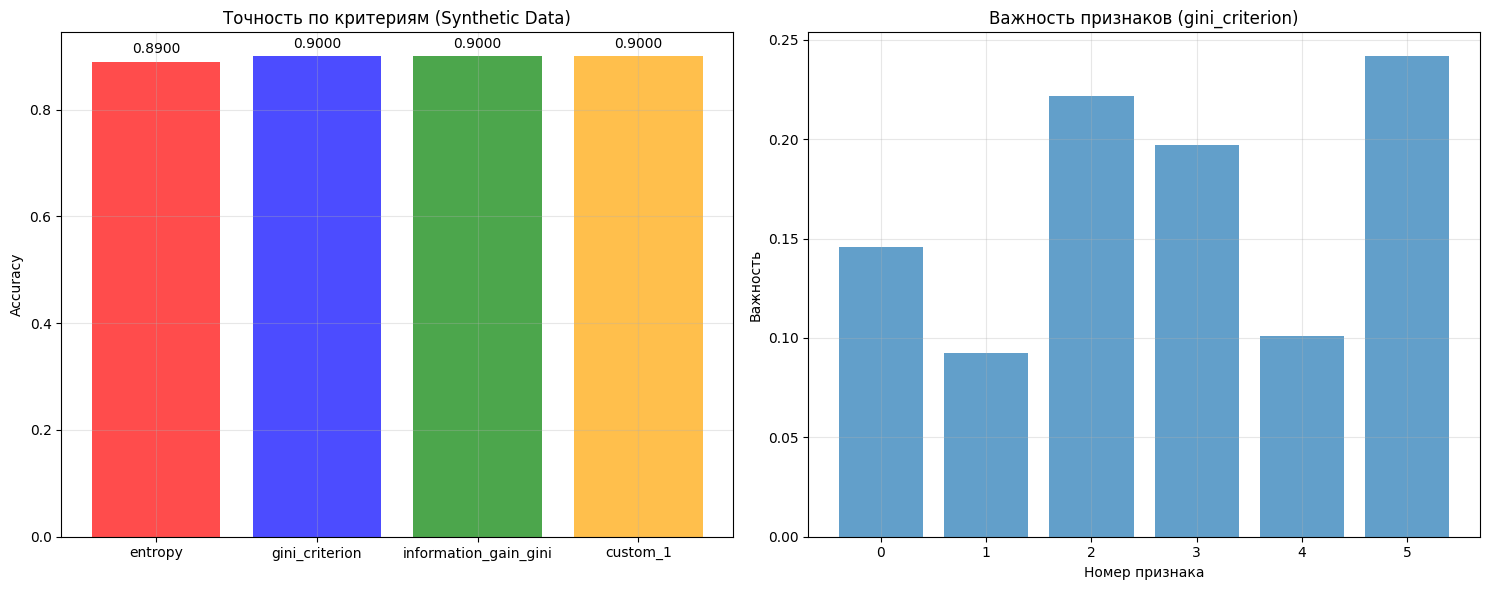


IRIS DATASET:
Размер данных: (150, 4)
Классы: [0 1 2]
Распределение классов: [50 50 50]

Сравнение критериев на Iris Dataset:

Критерий: entropy
Best gain: 0.9182958340544894
Best split: {'feature_index': 2, 'threshold': np.float64(1.9), 'left_indices': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'right_indices': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
 

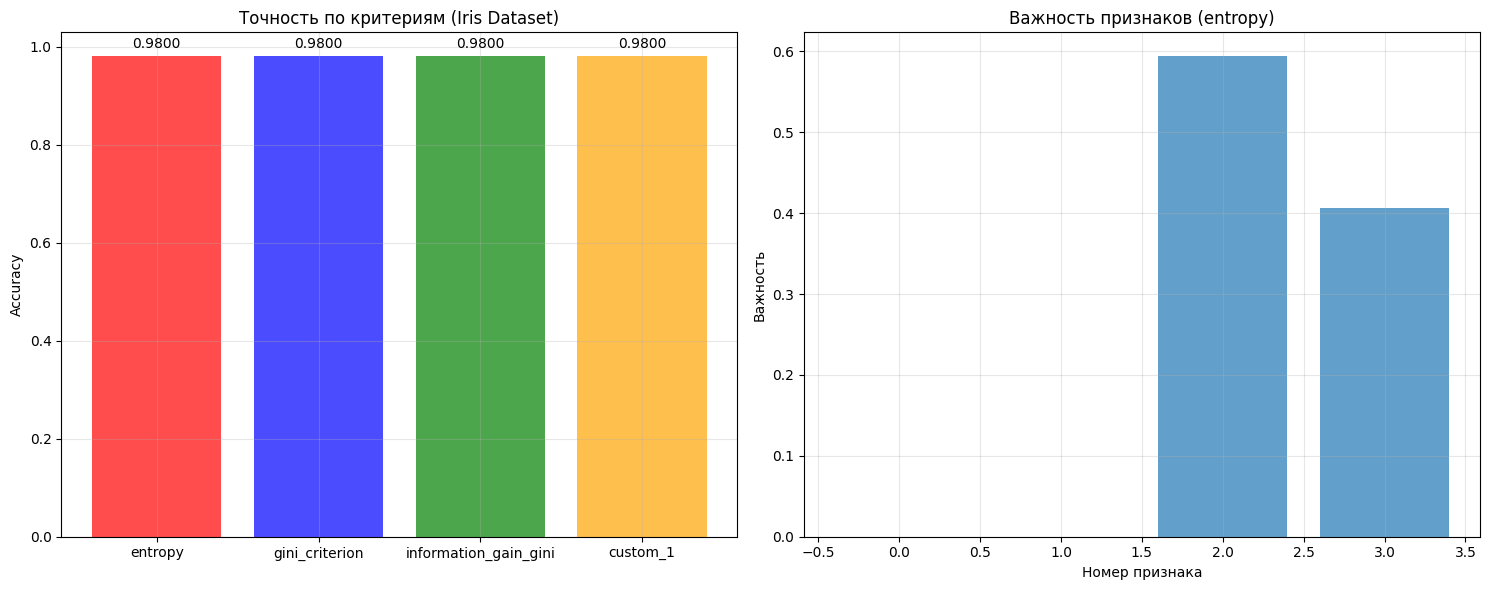


СВОДКА РЕЗУЛЬТАТОВ:

Synthetic Dataset:
  Лучший критерий: gini_criterion (точность: 0.9000)
  Худший критерий: entropy (точность: 0.8900)
  Baseline (самый частый класс): 0.3400

Iris Dataset:
  Лучший критерий: entropy (точность: 0.9800)
  Худший критерий: entropy (точность: 0.9800)
  Baseline (самый частый класс): 0.3333


In [33]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, adjusted_rand_score

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, criterion='entropy'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.tree = None                                                          # переменная, в которой будет храниться готовое дерево решений.
        self.feature_importances = None                                           # переменная для важности фич

    def entropy(self, y):
        counts = np.bincount(y)                                                   # Считаем количество объектов для каждого класса. Формат - [0,0,1,2,1,2,0]
        probabilities = counts / len(y)                                           # вероятность. Формат - [x/y, x1/y, x3/y]
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])          # суммируем вероятности. p - каждая итерация в полученном массиве 'probabilities'.

    def gini(self, y):
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def information_gain(self, y, left_indices, right_indices):
        if self.criterion == 'entropy':                                            # Выбор критерия
            impurity_func = self.entropy
        elif self.criterion == 'gini':
            impurity_func = self.gini
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")

        parent_impurity = impurity_func(y)                                         # неопределенность для всей выборки.
        left_impurity = impurity_func(y[left_indices])
        right_impurity = impurity_func(y[right_indices])

        n, n_left, n_right = len(y), len(left_indices), len(right_indices)
        weighted_impurity = (n_left / n) * left_impurity + (n_right / n) * right_impurity
        inf_gain = parent_impurity - weighted_impurity
        
        # print(f'Inf. gain "{self.criterion}": {inf_gain}')
        return inf_gain                                                            # возвращаем инф. выиг.

    def information_gain_gini(self, y, left_indices, right_indices):
        """Информационный выигрыш через Gini impurity (альтернативная реализация)"""
        parent_gini = self.gini(y)
        
        y_left = y[left_indices]
        y_right = y[right_indices]
        
        gini_left = self.gini(y_left)
        gini_right = self.gini(y_right)
        
        n_left = len(left_indices)
        n_right = len(right_indices)
        n_total = n_left + n_right
        
        children_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        information_gain = parent_gini - children_gini
        
        return information_gain

    def gini_criterion(self, y, left_indices, right_indices):
        """Критерий Джини (чем меньше impurity, тем лучше)"""
        y_left = y[left_indices]
        y_right = y[right_indices]
        
        gini_left = self.gini(y_left)
        gini_right = self.gini(y_right)
        
        n_left = len(left_indices)
        n_right = len(right_indices)
        n_total = n_left + n_right
        
        weighted_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        
        # Возвращаем отрицательное значение (чем меньше impurity, тем лучше)
        return -weighted_gini

    def custom_1(self, y_oh, left_indices, right_indices):
        N = y_oh.sum()

        left = y_oh[left_indices]
        right = y_oh[right_indices]
        p_1 = left.sum() / N
        p_2 = right.sum() / N
        num_classes = y_oh.shape[1]                                                # .shape[1] кол-во столбцов, .shape[0] - кол-во строк.

        sum_total = 0
        
        for l in range(num_classes):
            p_1l = left[:, l].sum() / N
            p_2l = right[:, l].sum() / N
            p_l = p_1l + p_2l
            b = 1
            
            # Избегаем деления на ноль
            # if p_1 > 0:
            sum_total += ((p_1l - p_1 * p_l)**2) / p_1 * b**2
            # if p_2 > 0:
            sum_total += ((p_2l - p_2 * p_l)**2) / p_2 * b**2

        
        return sum_total
  
    # Функция находит наиболее частый элемент в массиве y (метки классов).
    def most_common_label(self, y):
        return Counter(y).most_common(1)[0][0]

    def find_best_split(self, X, y, num_features, y_oh=None):
        best_gain = -float('inf')                                                  # хранит лучшее значение критерия
        best_split = None                                                          # будет содержать параметры наилучшего разбиения

        for feature_index in range(num_features):                                  # перебираем по очереди признаки.
            thresholds = np.unique(X[:, feature_index])                            # находим уникальные значения.
            for threshold in thresholds:                                           # для каждого уникального значения делим данные на 2 части.
                left_indices = np.where(X[:, feature_index] <= threshold)[0]       # левый - меньше уникального значения. [0] - нужен для возвращения массива, а не кортежа.
                right_indices = np.where(X[:, feature_index] > threshold)[0]       # правый - больше ун. знач. feature_index - искомый признак.

                if len(left_indices) == 0 or len(right_indices) == 0:              # условие неинформативности разбиения.
                    continue                                                       # если условие срабатывает, переходим к следующей итерации, пропуская то, что ниже.

                if self.criterion == 'custom_1':
                    if y_oh is None:
                        raise ValueError("y_oh required for custom_1 criterion")
                    gain = self.custom_1(y_oh, left_indices, right_indices)
                elif self.criterion == 'gini_criterion':
                    gain = self.gini_criterion(y, left_indices, right_indices)
                elif self.criterion == 'information_gain_gini':
                    gain = self.information_gain_gini(y, left_indices, right_indices)
                else:
                    gain = self.information_gain(y, left_indices, right_indices)   # рассчитываем инф. прирост.

                if gain > best_gain:                                               # если текущий прирост больше самого большого
                    best_gain = gain                                               # приравниваем переменную наибольшего к текущему.
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices,
                        'gain': gain
                    }                                                              # теперь это параметры разбиения, которые дают наилучший прирост.
        
        print(f"Best gain: {best_gain}")
        print(f"Best split: {best_split}")
        return best_split                                                          # После перебора всех признаков и порогов, возвращаем параметры лучшего найденного разбиения.

    def fit(self, X, y, y_oh=None):
        num_features = X.shape[1]
        self.feature_importances = np.zeros(num_features)                          # инициализируем нулями
        self.tree = self.grow_tree(X, y, y_oh, depth=0)

        # нормализуем важности, чтобы сумма = 1, как в sklearn
        total = self.feature_importances.sum()
        if total > 0:
            self.feature_importances /= total

    def grow_tree(self, X, y, y_oh, depth):
        num_samples, num_features = X.shape
        num_classes = len(set(y))

        if (depth == self.max_depth or 
            num_classes == 1 or 
            num_samples < self.min_samples_split):
            return self.most_common_label(y)

        if self.criterion == 'custom_1':
            best_split = self.find_best_split(X, y, num_features, y_oh)
        else:
            best_split = self.find_best_split(X, y, num_features)

        if best_split is None:
            return self.most_common_label(y)

        left_indices, right_indices = best_split['left_indices'], best_split['right_indices']

        # Вычисляем прирост информации для подсчета важности признаков
        if self.criterion == 'custom_1':
            gain = self.custom_1(y_oh, left_indices, right_indices)
        elif self.criterion == 'gini_criterion':
            gain = -best_split['gain']  # т.к. возвращали отрицательное значение
        elif self.criterion == 'information_gain_gini':
            gain = best_split['gain']
        else:
            gain = self.information_gain(y, left_indices, right_indices)

        self.feature_importances[best_split['feature_index']] += gain              # Сохраняем вклад этого признака в важность

        left_subtree = self.grow_tree(X[left_indices], y[left_indices], 
                                    y_oh[left_indices] if y_oh is not None else None, 
                                    depth + 1)
        right_subtree = self.grow_tree(X[right_indices], y[right_indices], 
                                     y_oh[right_indices] if y_oh is not None else None, 
                                     depth + 1)

        return {
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': left_subtree,
            'right': right_subtree
        }

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if isinstance(node, dict):
            if x[node['feature_index']] <= node['threshold']:
                return self._traverse_tree(x, node['left'])
            else:
                return self._traverse_tree(x, node['right'])

        return node                                                             # Если нет, то это лист и присваиваем метку.

# Функция для сравнения критериев
def compare_criteria(X, y, criteria_list, dataset_name="Dataset"):
    """Сравнивает разные критерии на одном датасете"""
    
    # One-hot encoding для custom_1
    encoder = OneHotEncoder(sparse_output=False)
    y_oh = encoder.fit_transform(y.reshape(-1, 1))
    
    results = {}
    
    print(f"Сравнение критериев на {dataset_name}:")
    print("=" * 60)
    
    for criterion in criteria_list:
        print(f"\nКритерий: {criterion}")
        
        # Создаем и обучаем дерево
        tree = DecisionTree(max_depth=5, min_samples_split=10, criterion=criterion)
        
        if criterion == 'custom_1':
            tree.fit(X, y, y_oh=y_oh)
        else:
            tree.fit(X, y)
        
        # Предсказания
        y_pred = tree.predict(X)
        accuracy = accuracy_score(y, y_pred)
        
        results[criterion] = {
            'accuracy': accuracy,
            'tree': tree,
            'feature_importances': tree.feature_importances
        }
        
        print(f"Точность: {accuracy:.4f}")
        print(f"Важность признаков: {tree.feature_importances}")
    
    # Визуализация результатов
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График точности
    accuracies = [results[crit]['accuracy'] for crit in criteria_list]
    bars = ax1.bar(criteria_list, accuracies, color=['red', 'blue', 'green', 'orange'], alpha=0.7)
    ax1.set_title(f'Точность по критериям ({dataset_name})')
    ax1.set_ylabel('Accuracy')
    ax1.grid(True, alpha=0.3)
    
    for bar, accuracy in zip(bars, accuracies):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{accuracy:.4f}', ha='center', va='bottom')
    
    # График важности признаков для лучшего критерия
    best_criterion = max(results.keys(), key=lambda x: results[x]['accuracy'])
    feature_importances = results[best_criterion]['feature_importances']
    
    if X.shape[1] <= 10:  # Показываем только если признаков не слишком много
        ax2.bar(range(len(feature_importances)), feature_importances, alpha=0.7)
        ax2.set_title(f'Важность признаков ({best_criterion})')
        ax2.set_xlabel('Номер признака')
        ax2.set_ylabel('Важность')
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results

# Пример использования
if __name__ == "__main__":
    # Создаем тестовые данные
    from sklearn.datasets import make_classification, load_iris
    
    # Тест на синтетических данных (исправленные параметры)
    X, y = make_classification(n_samples=100, n_features=6, n_classes=3, 
                              n_informative=3, n_redundant=2, n_repeated=0,
                              random_state=42)
    
    criteria_to_test = ['entropy', 'gini_criterion', 'information_gain_gini', 'custom_1']
    
    print("СИНТЕТИЧЕСКИЕ ДАННЫЕ:")
    print(f"Размер данных: {X.shape}")
    print(f"Классы: {np.unique(y)}")
    print(f"Распределение классов: {np.bincount(y)}")
    print()
    
    results_synthetic = compare_criteria(X, y, criteria_to_test, "Synthetic Data")
    
    # Тест на ирисах
    iris = load_iris()
    X_iris, y_iris = iris.data, iris.target
    
    print("\n" + "="*60)
    print("IRIS DATASET:")
    print(f"Размер данных: {X_iris.shape}")
    print(f"Классы: {np.unique(y_iris)}")
    print(f"Распределение классов: {np.bincount(y_iris)}")
    print()
    
    results_iris = compare_criteria(X_iris, y_iris, criteria_to_test, "Iris Dataset")
    
    # Дополнительный анализ
    print("\n" + "="*60)
    print("СВОДКА РЕЗУЛЬТАТОВ:")
    print("="*60)
    
    for dataset_name, results in [("Synthetic", results_synthetic), ("Iris", results_iris)]:
        print(f"\n{dataset_name} Dataset:")
        best_criterion = max(results.keys(), key=lambda x: results[x]['accuracy'])
        worst_criterion = min(results.keys(), key=lambda x: results[x]['accuracy'])
        
        print(f"  Лучший критерий: {best_criterion} (точность: {results[best_criterion]['accuracy']:.4f})")
        print(f"  Худший критерий: {worst_criterion} (точность: {results[worst_criterion]['accuracy']:.4f})")
        
        # Сравнение с baseline (просто предсказываем самый частый класс)
        baseline_accuracy = np.max(np.bincount(y if dataset_name == "Synthetic" else y_iris)) / len(y if dataset_name == "Synthetic" else y_iris)
        print(f"  Baseline (самый частый класс): {baseline_accuracy:.4f}")
